In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
file_path = r'D:\ACTUAL STUDY MATERIAL\PythonCodes\ML\Thyroid Cancer\Models\thyroid_cancer_risk_data.csv'
df = pd.read_csv(file_path)

In [36]:
df.shape

(212691, 17)

In [37]:
df.head(20)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
5,6,89,Male,UK,African,No,No,No,Yes,Yes,No,4.00,0.98,5.52,0.02,Medium,Benign
6,7,89,Female,South Korea,Asian,Yes,Yes,No,No,Yes,No,4.70,0.62,11.73,0.01,High,Malignant
7,8,38,Female,India,African,No,No,No,No,No,No,5.54,3.49,9.47,4.30,Medium,Benign
8,9,17,Female,Russia,African,No,Yes,No,No,No,Yes,2.30,2.60,11.89,0.81,High,Malignant
9,10,36,Male,Germany,Asian,No,No,No,No,Yes,No,1.34,0.56,4.51,1.44,Low,Benign


In [38]:
df["Ethnicity"].unique()

array(['Caucasian', 'Hispanic', 'Asian', 'African', 'Middle Eastern'],
      dtype=object)

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [41]:
df.drop(columns = 'Patient_ID', inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  object 
 2   Country              212691 non-null  object 
 3   Ethnicity            212691 non-null  object 
 4   Family_History       212691 non-null  object 
 5   Radiation_Exposure   212691 non-null  object 
 6   Iodine_Deficiency    212691 non-null  object 
 7   Smoking              212691 non-null  object 
 8   Obesity              212691 non-null  object 
 9   Diabetes             212691 non-null  object 
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  object 
 15  Diagnosis        

In [43]:
df.columns

Index(['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

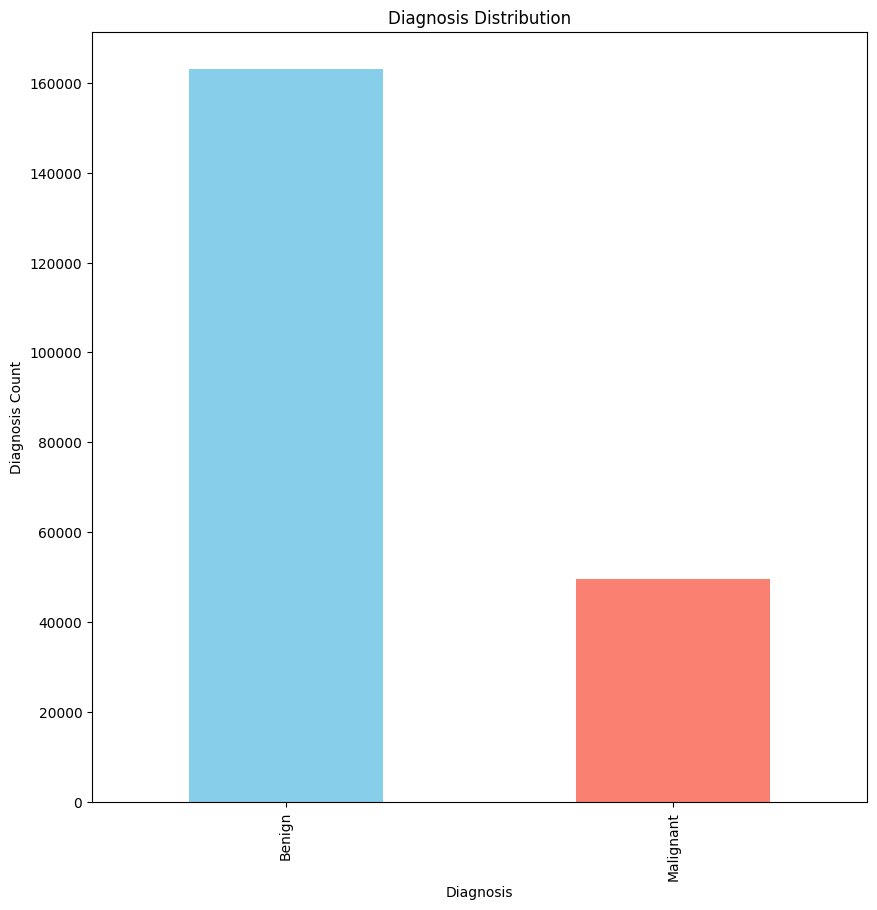

In [44]:
plt.figure(figsize=(10,10))
df['Diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Diagnosis Count')
plt.show()

Text(0.5, 0, 'Thyroid Cancer Risk')

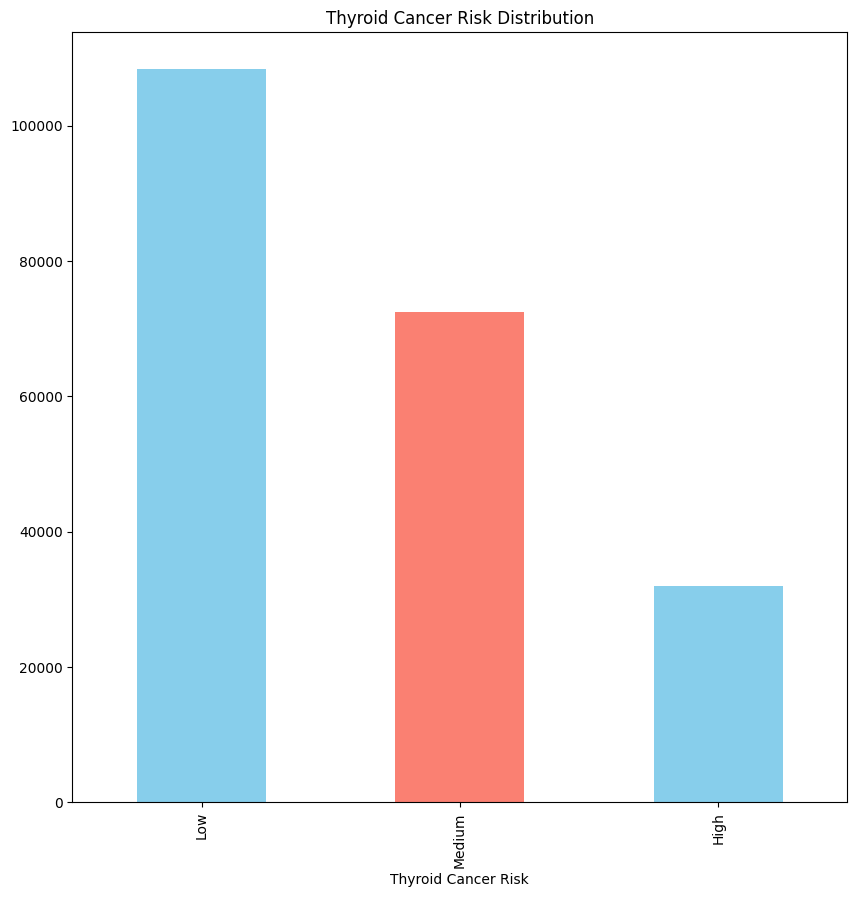

In [45]:
plt.figure(figsize=(10,10))
df['Thyroid_Cancer_Risk'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Thyroid Cancer Risk Distribution')
plt.xlabel('Thyroid Cancer Risk')

In [46]:
def country_to_continent(country_name):
    """Convert a country name to its corresponding continent using a predefined dictionary."""
    continent_dict = {
        'North America': ['United States', 'Canada', 'Mexico'],
        'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru'],
        'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Russia'],
        'Africa': ['Nigeria', 'South Africa', 'Egypt', 'Kenya', 'Ghana'],
        'Asia': ['China', 'India', 'Japan', 'South Korea', 'Indonesia'],
        'Oceania': ['Australia', 'New Zealand']
    }

    for continent, countries in continent_dict.items():
        if country_name in countries:
            return continent
    return 'Unknown'

# Example usage
df['Continent'] = df['Country'].apply(country_to_continent)

In [47]:
features_to_keep =['Diagnosis',
'Ethnicity',
'Family_History',
'Iodine_Deficiency',
'Radiation_Exposure',
'Continent','Gender','Obesity','Diabetes','Thyroid_Cancer_Risk']

columns_to_drop = [cols for cols in df if cols not in features_to_keep]
df.drop(columns=columns_to_drop, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_672\3403136212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_672\3403136212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_672\3403136212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_672\3403136212.py:13: FutureWarning: 

Passi

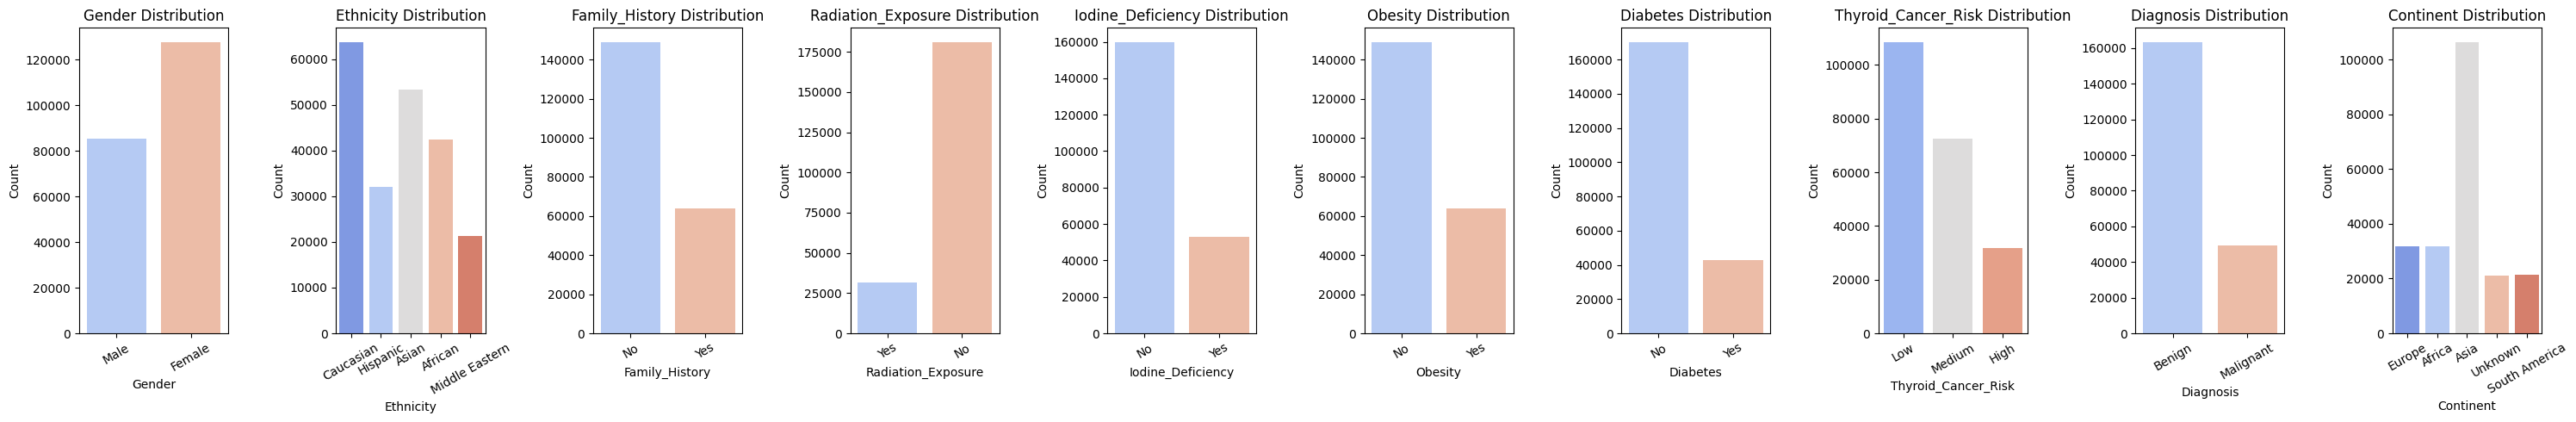

In [48]:

# Define the categorical columns to visualize
categorical_cols = [cols for cols in df.columns if df[cols].dtype == 'object']

num_cols = len(categorical_cols)
fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 3, 5))

# Ensure axes is always iterable (for single plots, wrap in a list)
if num_cols == 1:
    axes = [axes]

# Loop through the categorical columns and create count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels if needed

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [49]:
label_columns = [columns for columns in df.columns if df[columns].dtype == 'object']

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in label_columns:
  df[column] = le.fit_transform(df[column])

In [51]:
df.head()

,Gender,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis,Continent
0,1,2,0,1,0,0,0,1,0,2
1,1,3,0,1,0,0,0,1,0,2
2,1,2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,2,0,1
4,0,0,1,1,0,0,0,0,0,2


In [52]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling strategy
rus = RandomUnderSampler(random_state=42)

# Separate features and target
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target (Binary: 0=Benign, 1=Malignant)

# Apply undersampling
#X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert back to DataFrame (optional)
#df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
#df_resampled['Diagnosis_Malignant'] = y_resampled

<function matplotlib.pyplot.show(close=None, block=None)>

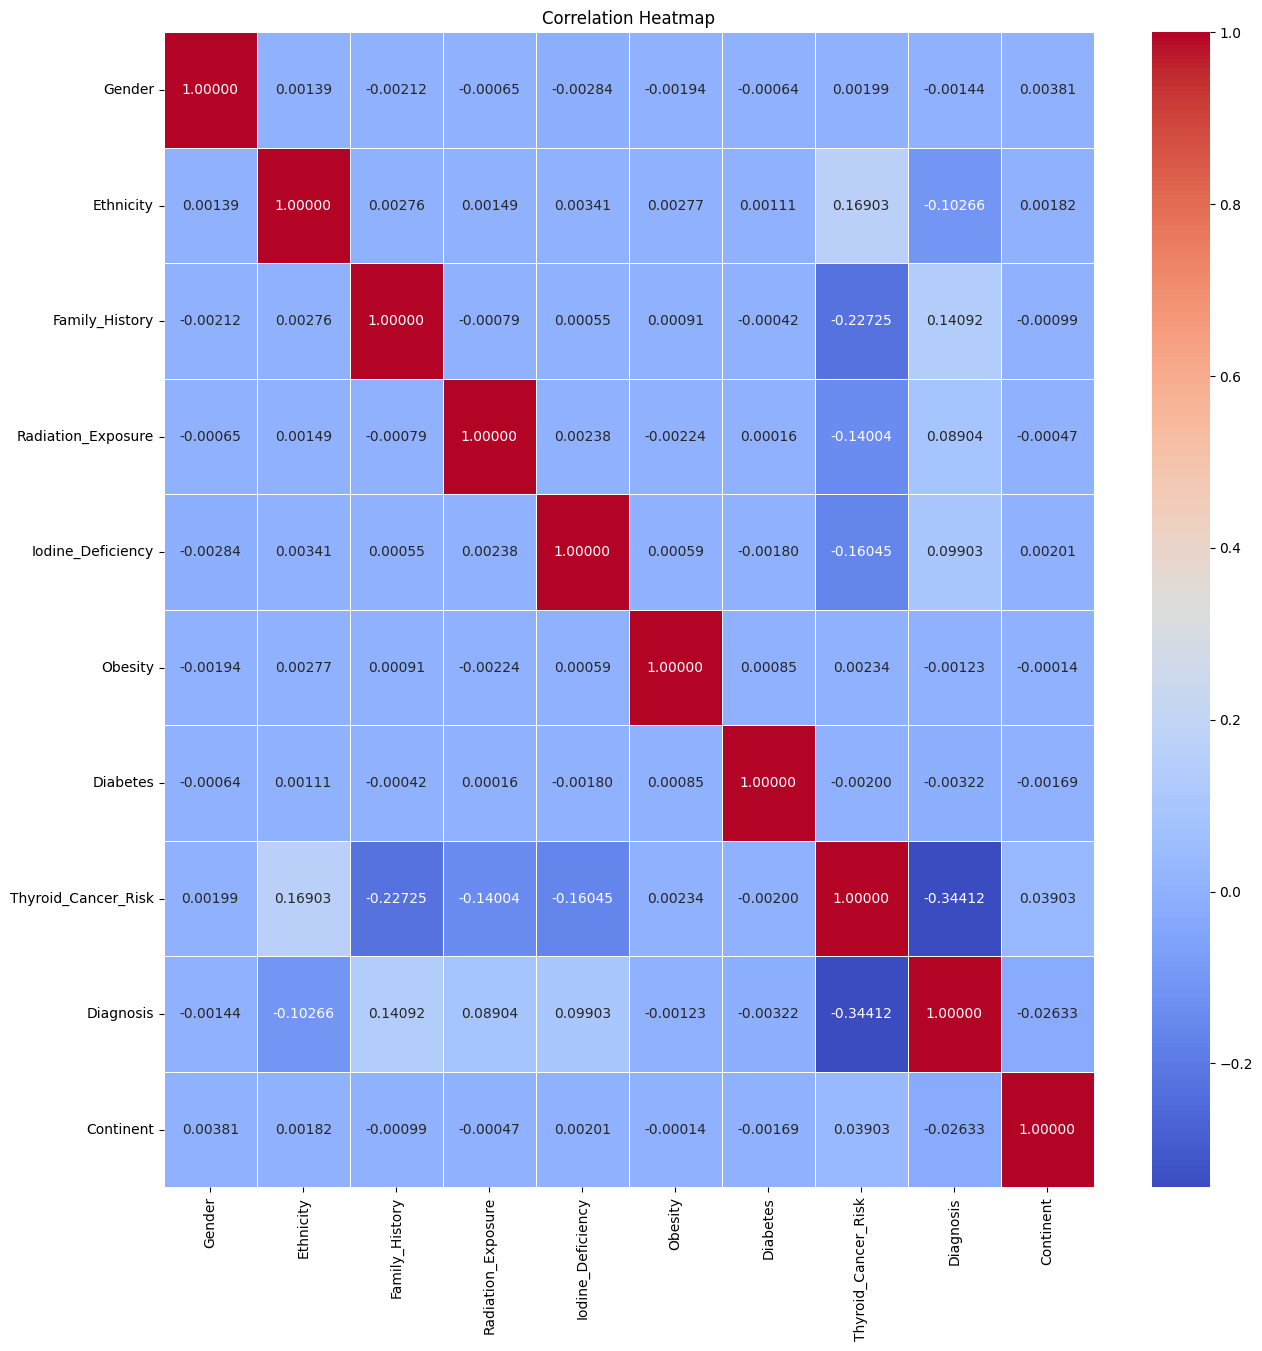

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True , cmap = 'coolwarm',fmt=".5f",linewidths=0.5,annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77     65270
           1       0.38      0.58      0.46     19807

    accuracy                           0.68     85077
   macro avg       0.61      0.65      0.62     85077
weighted avg       0.74      0.68      0.70     85077

[[46511 18759]
 [ 8282 11525]]


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8059992712483985


In [60]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     65270
           1       0.61      0.47      0.53     19807

    accuracy                           0.81     85077
   macro avg       0.73      0.69      0.70     85077
weighted avg       0.79      0.81      0.80     85077

[[59316  5954]
 [10551  9256]]


In [61]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,class_weight='balanced',random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

d:\ACTUAL STUDY MATERIAL\PythonCodes\ML\Thyroid Cancer\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8264395782643957


In [62]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     65270
           1       0.70      0.45      0.55     19807

    accuracy                           0.83     85077
   macro avg       0.77      0.70      0.72     85077
weighted avg       0.81      0.83      0.81     85077

[[61379  3891]
 [10875  8932]]


In [63]:
import joblib
joblib.dump(rf, 'thyroid_cancer_risk_model_rf.pkl')

['thyroid_cancer_risk_model_rf.pkl']

In [64]:
df.head()

,Gender,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis,Continent
0,1,2,0,1,0,0,0,1,0,2
1,1,3,0,1,0,0,0,1,0,2
2,1,2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,2,0,1
4,0,0,1,1,0,0,0,0,0,2


In [65]:
df["Ethnicity"].unique()

array([2, 3, 1, 0, 4])